In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Cancer Data
breast_cancer = load_breast_cancer()
x = breast_cancer.data
y = breast_cancer.target

In [3]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y = pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [5]:
data=load_breast_cancer()
data.keys()
 
# Check the output classes
print(data['target_names'])
 
# Check the input attributes
print(data['feature_names'])

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
x.shape

(569, 30)

In [7]:
y.shape

(569, 1)

In [9]:
# construct a dataframe using pandas
df1=pd.DataFrame(data['data'],columns=data['feature_names'])
 
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(df1)
Scaled_data=scaling.transform(df1)
 
# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

In [17]:
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC

accuracyH = np.zeros(31)
precisionH = np.zeros(31)
recallH = np.zeros(31)

for i in range(1,31):
    
    principal=PCA(n_components=i)
    X = principal.fit_transform(Scaled_data)    
    
    np.random.seed(0) 
    x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 0)
    
    classifier = SVC(kernel='linear', C=50) #create SVC
    classifier.fit(x_train, y_train)
    
    y_pred = classifier.predict(x_test) #predicting the result based of the classifier
    
    accuracyH[i] = metrics.accuracy_score(y_test, y_pred)
    precisionH[i] = metrics.precision_score(y_test, y_pred)
    recallH[i] = metrics.recall_score(y_test, y_pred)
    
print('K:', i,':', accuracyH[i])

K: 30 : 0.9649122807017544


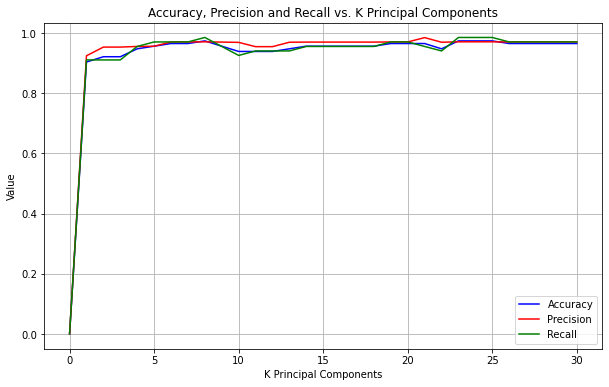

In [45]:
#plotting
plt.plot(range(0, 31), accuracyH, color = 'blue', label = 'Accuracy')
plt.plot(range(0, 31), precisionH, color = 'red', label = 'Precision')
plt.plot(range(0, 31), recallH, color = 'green', label = 'Recall')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('K Principal Components') 
plt.ylabel('Value') 
plt.title('Accuracy, Precision and Recall vs. K Principal Components') 
plt.legend()

In [ ]:
####################################################################
#Different types of SVC

Poly Accuracy: 0.9824561403508771
Poly Accuracy: 0.9710144927536232
Poly Accuracy: 1.0


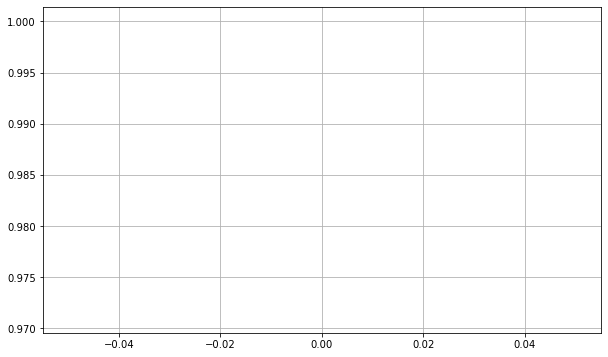

In [51]:
#Polynomial Kernel Implementation

np.random.seed(0) 
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 0)
classifier = SVC(kernel='poly', C=50) #create SVC
classifier.fit(x_train, y_train)
    
y_pred = classifier.predict(x_test)
    
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print('Poly Accuracy:', accuracy)
print('Poly Accuracy:', precision)
print('Poly Accuracy:', recall)

#plotting
plt.plot(accuracy, color = 'blue', label = 'Accuracy')
plt.plot(precision, color = 'red', label = 'Precision')
plt.plot(recall, color = 'green', label = 'Recall')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 

RBF Accuracy: 0.956140350877193
RBF Accuracy: 1.0
RBF Accuracy: 0.9253731343283582


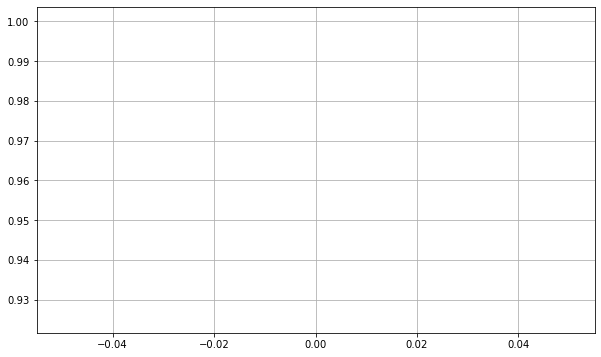

In [52]:
#Gaussian Radial Basis (RBF) Kernel Implementation 

np.random.seed(0) 
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 0)
classifier = SVC(kernel='rbf', C=50) #create SVC
classifier.fit(x_train, y_train)
    
y_pred = classifier.predict(x_test)
    
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print('RBF Accuracy:', accuracy)
print('RBF Accuracy:', precision)
print('RBF Accuracy:', recall)

#plotting
plt.plot(accuracy, color = 'blue', label = 'Accuracy')
plt.plot(precision, color = 'red', label = 'Precision')
plt.plot(recall, color = 'green', label = 'Recall')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 

Sigmoid Accuracy: 0.8771929824561403
Sigmoid Precision: 0.9076923076923077
Sigmoid Recall: 0.8805970149253731


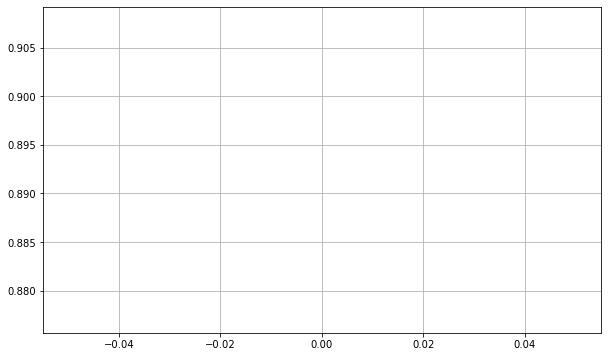

In [69]:
#Sigmoid Kernel Implementation

np.random.seed(0) 
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 0)
classifier = SVC(kernel='sigmoid', C=50) #create SVC
classifier.fit(x_train, y_train)
    
y_pred = classifier.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print('Sigmoid Accuracy:', accuracy)
print('Sigmoid Precision:', precision)
print('Sigmoid Recall:', recall)

#plotting
plt.plot(accuracy, label="accuracy", color = 'purple') 
plt.plot(precision, label="precision", color = 'red')
plt.plot(recall, label="recall", color = 'green')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 

In [54]:
############################################################################
#Problem 2

In [118]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [119]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [120]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [121]:
price = df_train.values[:, 0]
area = df_train.values[:, 1]
bedrooms = df_train.values[:, 2]
bathrooms = df_train.values[:, 3]
stories = df_train.values[:, 4]
mainroad = df_train.values[:, 5]
guestroom = df_train.values[:, 6]
basement = df_train.values[:, 7]
hotwaterheating = df_train.values[:, 8]
airconditioning = df_train.values[:, 9]
parking = df_train.values[:, 10]
prefarea = df_train.values[:, 11]

M = len(df_train)

X0 = np.ones((M,1))
X1 = area.reshape(M,1)
X2 = bedrooms.reshape(M,1)
X3 = bathrooms.reshape(M,1)
X4 = stories.reshape(M,1)
X5 = mainroad.reshape(M,1)
X6 = guestroom.reshape(M,1)
X7 = basement.reshape(M,1)
X8 = hotwaterheating.reshape(M,1)
X9 = airconditioning.reshape(M,1)
X10 = parking.reshape(M,1)
X11 = prefarea.reshape(M,1)


# create X and Y
X = np.hstack((X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11))
Y = price

In [122]:
print('X data:', X[:5])
print(X.shape)

X data: [[1.0 3620 2 1 1 1 0 0 0 0 0 0]
 [1.0 4000 2 1 1 1 0 0 0 0 0 0]
 [1.0 3040 2 1 1 0 0 0 0 0 0 0]
 [1.0 3600 2 1 1 1 0 0 0 0 0 0]
 [1.0 9860 3 1 1 1 0 0 0 0 0 0]]
(436, 12)


In [123]:
print('Y data:', Y[:5])
print(Y.shape)

Y data: [1750000 2695000 2870000 2590000 4515000]
(436,)


In [124]:
np.random.seed(0) 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
X = scaling.fit_transform(X)
Y =Y.reshape(-1,1)
Y.shape

(436, 1)

In [131]:
scaledtestX = scaling.fit_transform(x_test)
print(scaledX[:5])

Y_standard = scaling.fit_transform(Y)
Y_standard.shape

[[ 0.          1.82750687  0.08129831  1.57893436  0.24494719  0.4
  -0.48377945 -0.70253984 -0.19699231  1.44209778  1.46132229 -0.55522129]
 [ 0.         -0.84050994  1.42852743  1.57893436  0.24494719  0.4
  -0.48377945  1.42340681 -0.19699231  1.44209778  1.46132229 -0.55522129]
 [ 0.         -0.95952928 -1.26593081  1.57893436 -0.9069666   0.4
  -0.48377945  1.42340681 -0.19699231 -0.69343425  1.46132229 -0.55522129]
 [ 0.          0.14139959  2.77575655 -0.55079106  0.24494719  0.4
   2.06705764  1.42340681 -0.19699231  1.44209778 -0.78885539  1.80108368]
 [ 0.         -0.73140888 -1.26593081 -0.55079106 -0.9069666   0.4
  -0.48377945 -0.70253984 -0.19699231 -0.69343425 -0.78885539 -0.55522129]]


(436, 1)

In [161]:
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error

MSE=np.zeros(12)

for k in range(1,12):  
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    x_train, x_test, y_train, y_test = train_test_split(principalComponents, Y_standard, test_size = 0.2, random_state=0)
    print (f"Number of components = {k}")
    svr = SVR(kernel='rbf').fit(x_train, y_train.ravel())
    y_fit = svr.predict(x_test)
 
    MSE[k] = mean_squared_error(y_test, y_fit)
    print("MSE:", MSE[k])


Number of components = 1
MSE: 0.3644840436956008
Number of components = 2
MSE: 0.38288403410802113
Number of components = 3
MSE: 0.4083951339460144
Number of components = 4
MSE: 0.4331461644970008
Number of components = 5
MSE: 0.4551463094973391
Number of components = 6
MSE: 0.42214664787795064
Number of components = 7
MSE: 0.43509961838130856
Number of components = 8
MSE: 0.4603122517656381
Number of components = 9
MSE: 0.45586768343211137
Number of components = 10
MSE: 0.4474835740713962
Number of components = 11
MSE: 0.45317926392228086


Text(0.5, 1.0, 'RBF Kernel ')

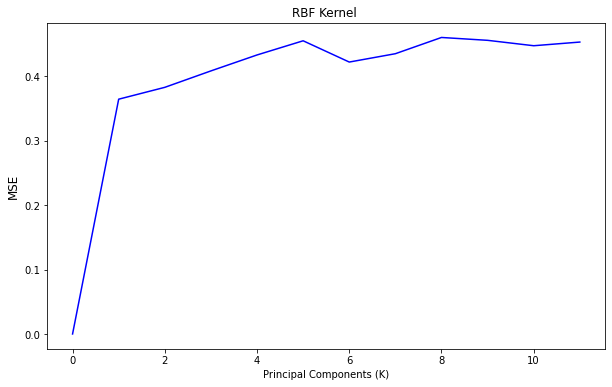

In [162]:
plt.xlabel("Principal Components (K)")
plt.ylabel("MSE", fontsize = 12)
plt.plot(MSE, label="MSE", color = 'blue') 
plt.title('RBF Kernel ')


In [163]:
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error

MSE=np.zeros(12)

for k in range(1,12):  
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    x_train, x_test, y_train, y_test = train_test_split(principalComponents, Y_standard, test_size = 0.2, random_state=0)
    print (f"Number of components = {k}")
    svr = SVR(kernel='linear').fit(x_train, y_train.ravel())
    y_fit = svr.predict(x_test)
 
    MSE[k] = mean_squared_error(y_test, y_fit)
    print("MSE:", MSE[k])

Number of components = 1
MSE: 0.41970138141985447
Number of components = 2
MSE: 0.42724131914884106
Number of components = 3
MSE: 0.4235375443911899
Number of components = 4
MSE: 0.4361227219623865
Number of components = 5
MSE: 0.4387098322365363
Number of components = 6
MSE: 0.43498863076237604
Number of components = 7
MSE: 0.4255467603280587
Number of components = 8
MSE: 0.41917818961854414
Number of components = 9
MSE: 0.38463466695218235
Number of components = 10
MSE: 0.3861429362335081
Number of components = 11
MSE: 0.3610696460405301


Text(0.5, 1.0, 'Linear Kernel ')

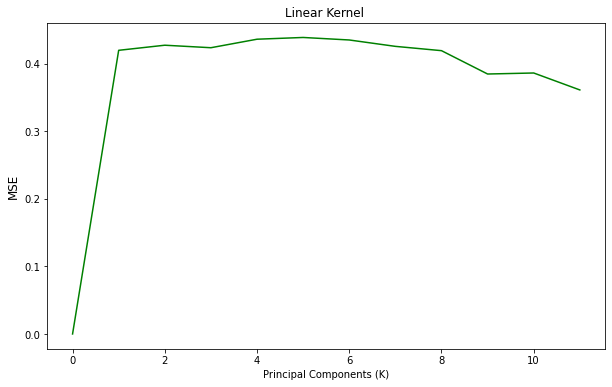

In [164]:
plt.xlabel("Principal Components (K)")
plt.ylabel("MSE", fontsize = 12)
plt.plot(MSE, label="MSE", color = 'green') 
plt.title('Linear Kernel ')

In [165]:
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error

MSE=np.zeros(12)

for k in range(1,12):  
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    x_train, x_test, y_train, y_test = train_test_split(principalComponents, Y_standard, test_size = 0.2, random_state=0)
    print (f"Number of components = {k}")
    svr = SVR(kernel='sigmoid').fit(x_train, y_train.ravel())
    y_fit = svr.predict(x_test)
 
    MSE[k] = mean_squared_error(y_test, y_fit)
    print("MSE:", MSE[k])

Number of components = 1
MSE: 182.16833815885357
Number of components = 2
MSE: 84.4662044688834
Number of components = 3
MSE: 29.259607723480624
Number of components = 4
MSE: 18.806420248305855
Number of components = 5
MSE: 7.523906859977575
Number of components = 6
MSE: 5.252263779214355
Number of components = 7
MSE: 3.8903090985198148
Number of components = 8
MSE: 4.4170202640658465
Number of components = 9
MSE: 3.222719370377815
Number of components = 10
MSE: 1.7739685452188387
Number of components = 11
MSE: 1.517604858396763


Text(0.5, 1.0, 'Sigmoid Kernel ')

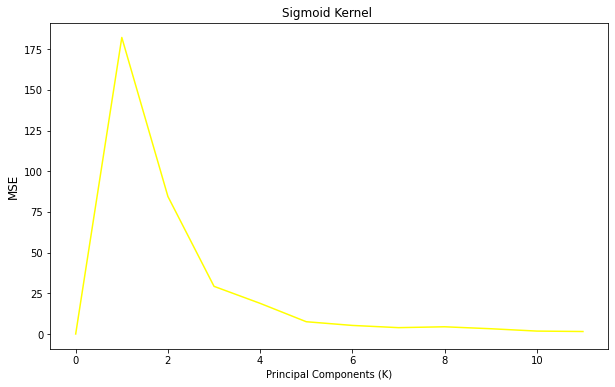

In [166]:
plt.xlabel("Principal Components (K)")
plt.ylabel("MSE", fontsize = 12)
plt.plot(MSE, label="MSE", color = 'yellow') 
plt.title('Sigmoid Kernel ')